    Problem Statement:
You are the Data Scientist at a telecom company “Leo” whose customers are churning out to its competitors. You have to analyse the data of your company and find insights and stop your customers from churning out to other telecom companies.

    Domain: Telecom

    Domain Context:

Customer churn, in simple terms means that the customer has stopped doing business with the company and this is a common problem when it comes to telecom industries. 

To avoid this, companies use predictive analysis to gauge the factors responsible for a customer to leave the company. 

These churn prediction models help in finding out the customer base that are most likely to churn out.

In [2]:
import pandas as pd
#In case of Missing optional dependency 'openpyxl', conda install -c conda-forge openpyxl

Customer_churn Dataset:

The details regarding this ‘customer_churn’ dataset are present in the data dictionary:

In [3]:
ccdd=pd.read_excel("customer-churn-data dictionary.xlsx")
pd.set_option('display.max_colwidth', None)  # Display full column width
display(ccdd)

,Column Name,Description of Column,Column Type
0,customerID,Tells the customer ID,object
1,gender,Whether the customer is a male or a female,object
2,SeniorCitizen,"Whether the customer is a senior citizen or not (1, 0)",int64
3,Partner,"Whether the customer has a partner or not (Yes, No)",Object
4,Dependents,"Whether the customer has dependents or not (Yes, No)",object
5,tenure,Number of months the customer has stayed with the company,int64
6,PhoneService,"Whether the customer has a phone service or not (Yes, No)",object
7,MultipleLines,"Whether the customer has multiple lines or not (Yes, No, No phone service)",object
8,InternetService,"Customer’s internet service provider (DSL, Fiber optic, No)",object
9,OnlineSecurity,"Whether the customer has online security or not (Yes, No, No internet service)",object


In [4]:
cc_df=pd.read_csv("customer_churn.csv")

cc_df.head()



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


    Tasks to be done:

    A) Data Manipulation:

a. Find the total number of male customers

In [6]:
print("Total number of male customers:", cc_df['gender'][cc_df['gender'] == 'Male'].count())

Total number of male customers: 3555


b. Find the total number of customers whose Internet Service is ‘DSL’

In [7]:
print("Total number of customers whose Internet Service is 'DSL':", cc_df['InternetService'][cc_df['InternetService'] == 'DSL'].count())

Total number of customers whose Internet Service is 'DSL': 2421


c. Extract all the Female senior citizens whose Payment Method is Mailed check & store the result in ‘new_customer’

In [8]:
new_customer=cc_df[ (cc_df['gender'] == 'Female') & (cc_df['SeniorCitizen'] == 1) & (cc_df['PaymentMethod']=='Mailed check')]
new_customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
139,0390-DCFDQ,Female,1,Yes,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.45,70.45,Yes
176,2656-FMOKZ,Female,1,No,No,15,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.45,1145.7,Yes
267,3197-ARFOY,Female,1,No,No,19,Yes,No,Fiber optic,Yes,...,No,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,105.00,2007.25,No
451,5760-WRAHC,Female,1,No,No,22,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Month-to-month,Yes,Mailed check,69.75,1545.4,No
470,4933-IKULF,Female,1,No,No,17,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,330.6,No


d. Extract all those customers whose tenure is less than 10 months or their Total charges is less than 500$ & store the result in ‘new_customer’

In [9]:
cc_df['TotalCharges'] = pd.to_numeric(cc_df['TotalCharges'], errors='coerce')

new_customer=cc_df[ (cc_df['tenure'] < 10 ) | (cc_df['TotalCharges'] < 500) ]
new_customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No


    B) Data Visualization:


a. Build a pie-chart to show the distribution of customers would be churning out.

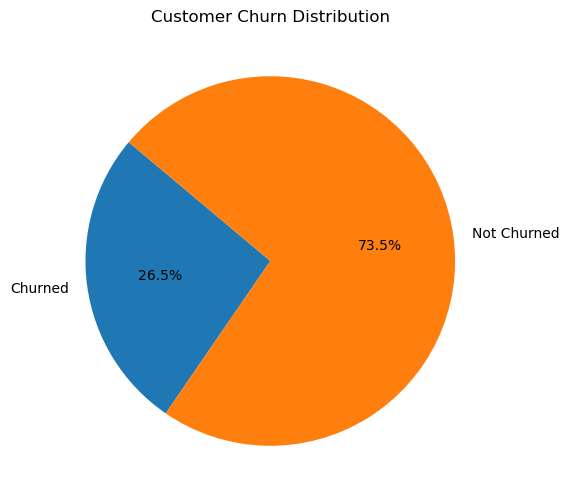

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

churned_count = cc_df[cc_df['Churn'] == 'Yes'].shape[0]
not_churned_count = cc_df[cc_df['Churn'] == 'No'].shape[0]

# Prepare pie chart data
labels = ['Churned', 'Not Churned']
sizes = [churned_count, not_churned_count]

# Create pie chart
plt.figure(figsize=(6, 6))  # Set figure size for better visualization
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=140)  # Customize labels and angle
plt.title("Customer Churn Distribution")


# Display pie chart
plt.show()

b. Build a bar-plot to show the distribution of ‘Internet Service’

([0, 1, 2], [Text(0, 0, 'Fiber optic'), Text(1, 0, 'DSL'), Text(2, 0, 'No')])

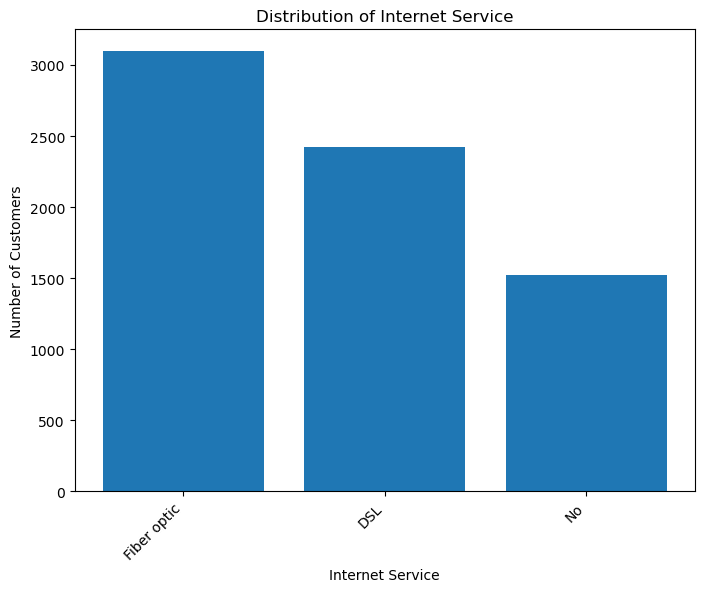

In [11]:
internet_service_counts = cc_df['InternetService'].value_counts()

# Prepare bar chart data
service_types = internet_service_counts.index.to_numpy()
service_counts = internet_service_counts.to_numpy()

plt.figure(figsize=(8, 6)) 
plt.bar(service_types, service_counts)
plt.xlabel('Internet Service')
plt.ylabel('Number of Customers')
plt.title('Distribution of Internet Service')
plt.xticks(rotation=45, ha='right')



    C) Model Building:

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input,Dropout
from sklearn.metrics import confusion_matrix

label_encoder = LabelEncoder()
cc_df['Churn'] = label_encoder.fit_transform(cc_df['Churn'])  # Converts 'Yes'/'No' to 1/0

X = cc_df[['tenure']].values
y = cc_df[['Churn']].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(5634, 1)
(1409, 1)
(5634, 1)
(1409, 1)


    a. Build a sequential model using Keras, to find out if the customerwouldchurn or not, using ‘tenure’ as the feature and ‘Churn’ as the dependent/target column:
i. The visible/input layer should have 12 nodes with ‘Relu’ as activation function.

ii. This model would have 1 hidden layer with 8 nodes and ‘Relu’ as activation function

iii. Use ‘Adam’ as the optimization algorithm

iv. Fit the model on the train set, with number of epochs to be 150

v. Predict the values on the test set and build a confusion matrix

vi. Plot the ‘Accuracy vs Epochs’ graph

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 12)             │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 137 (548.00 B)

 Trainable params: 137 (548.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7389 - loss: 1.1997 - val_accuracy: 0.7544 - val_loss: 0.4984
Epoch 2/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7481 - loss: 0.5226 - val_accuracy: 0.7544 - val_loss: 0.4980
Epoch 3/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7553 - loss: 0.5169 - val_accuracy: 0.7573 - val_loss: 0.4983
Epoch 4/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7615 - loss: 0.5118 - val_accuracy: 0.7573 - val_loss: 0.4982
Epoch 5/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7540 - loss: 0.5145 - val_accuracy: 0.7353 - val_loss: 0.4973
Epoch 6/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7411 - loss: 0.5135 - val_accuracy: 0.7353 - val_loss: 0.5001
Epoch 7/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7510 - loss: 0.5121 - val_accuracy: 0.7573 - val_loss: 0.5013
Epoch 8/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7371 - loss: 0.5139 - val_accu

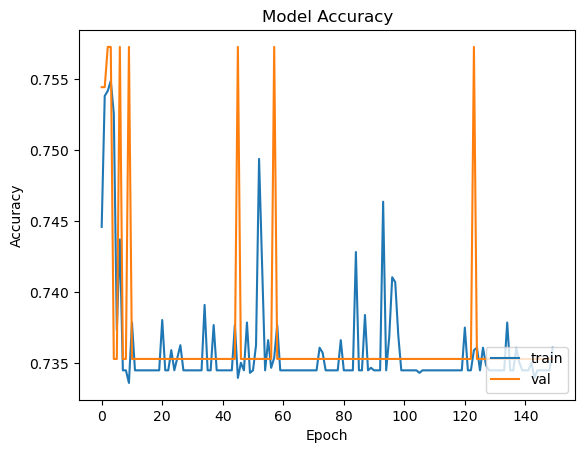

In [13]:
# Create the model
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary() #model summary
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # Compile the model
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_test, y_test)) # Train the model


y_pred = model.predict(X_test) # Predict on the test set
y_pred = (y_pred > 0.5)


cm = confusion_matrix(y_test, y_pred) # Create the confusion matrix

# Plot the accuracy vs epochs graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

    b. Build the 2nd model using same target and feature variables:
i. Add a drop-out layer after the input layer with drop-out value of 0.3

ii. Add a drop-out layer after the hidden layer with drop-out value of 0.2

iii. Predict the values on the test set and build a confusion matrix

iv. Plot the ‘Accuracy vs Epochs’ graph

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 12)             │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 137 (548.00 B)

 Trainable params: 137 (548.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4478 - loss: 4.1511 - val_accuracy: 0.7353 - val_loss: 0.7046
Epoch 2/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6402 - loss: 1.1733 - val_accuracy: 0.7353 - val_loss: 0.5492
Epoch 3/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6697 - loss: 0.8526 - val_accuracy: 0.7353 - val_loss: 0.4985
Epoch 4/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6828 - loss: 0.7783 - val_accuracy: 0.7353 - val_loss: 0.5042
Epoch 5/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6988 - loss: 0.6443 - val_accuracy: 0.7353 - val_loss: 0.5098
Epoch 6/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7021 - loss: 0.6406 - val_accuracy: 0.7353 - val_loss: 0.5154
Epoch 7/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6994 - loss: 0.6223 - val_accuracy: 0.7353 - val_loss: 0.5191
Epoch 8/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7129 - loss: 0.5810 - val_accu

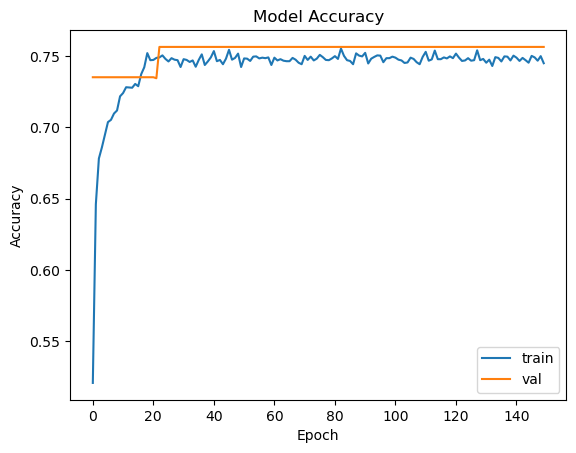

In [14]:
# Create the model
model_2 = Sequential()
model_2.add(Input(shape=(X_train.shape[1],)))
model_2.add(Dense(12, activation='relu'))
model_2.add(Dropout(0.3))
model_2.add(Dense(8, activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(1, activation='sigmoid'))

model_2.summary() #model summary
model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # Compile the model
history_2 = model_2.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_test, y_test)) # Train the model


y_pred_2 = model_2.predict(X_test) # Predict on the test set
y_pred_2 = (y_pred_2 > 0.5)


cm_2 = confusion_matrix(y_test, y_pred_2) # Create the confusion matrix


# Plot the accuracy vs epochs graph
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

    c. Build the 3rd model using ‘Tenure’, ’Monthly Charges’ & ‘Total Charges’ as the features and ‘Churn’ as the dependent/target column:
i. The visible/input layer should have 12 nodes with ‘Relu’ as activation function.

ii. This model would have 1 hidden layer with 8 nodes and ‘Relu’ as activation function

iii. Use ‘Adam’ as the optimization algorithm

iv. Fit the model on the train set, with number of epochs to be 150

v. Predict the values on the test set and build a confusion matrix

vi. Plot the ‘Accuracy vs Epochs’ graph

(5634, 3)
(1409, 3)
(5634, 1)
(1409, 1)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 12)             │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161 (644.00 B)

 Trainable params: 161 (644.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6348 - loss: 160.1681 - val_accuracy: 0.7353 - val_loss: 0.6409
Epoch 2/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7352 - loss: 0.6309 - val_accuracy: 0.7353 - val_loss: 0.6074
Epoch 3/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7411 - loss: 0.5987 - val_accuracy: 0.7353 - val_loss: 0.5901
Epoch 4/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7349 - loss: 0.5884 - val_accuracy: 0.7353 - val_loss: 0.5825
Epoch 5/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7354 - loss: 0.5814 - val_accuracy: 0.7353 - val_loss: 0.5795
Epoch 6/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7207 - loss: 0.5923 - val_accuracy: 0.7353 - val_loss: 0.5784
Epoch 7/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7330 - loss: 0.5805 - val_accuracy: 0.7353 - val_loss: 0.5781
Epoch 8/150
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7336 - loss: 0.5798 - val_ac

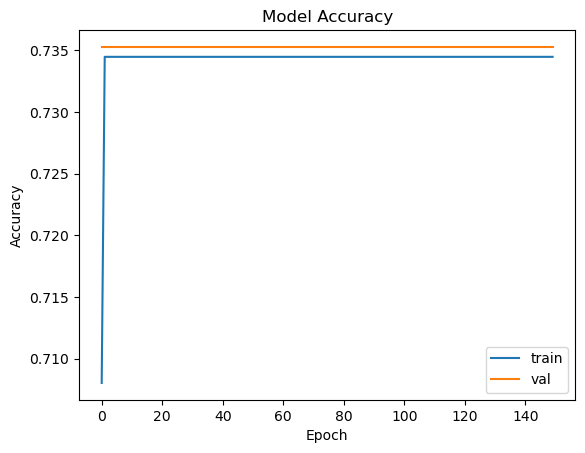

In [15]:
label_encoder = LabelEncoder()
cc_df['Churn'] = label_encoder.fit_transform(cc_df['Churn'])  # Converts 'Yes'/'No' to 1/0

X = cc_df[['tenure','MonthlyCharges','TotalCharges']].values
y = cc_df[['Churn']].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

model_3 = Sequential()
model_3.add(Input(shape=(X_train.shape[1],)))
model_3.add(Dense(12, activation='relu'))
model_3.add(Dense(8, activation='relu'))
model_3.add(Dense(1, activation='sigmoid'))

model_3.summary() #model summary
model_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # Compile the model
history_3 = model_3.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_test, y_test)) # Train the model


y_pred_3 = model_3.predict(X_test) # Predict on the test set
y_pred_3 = (y_pred_3 > 0.5)


cm_3 = confusion_matrix(y_test, y_pred_3) # Create the confusion matrix


# Plot the accuracy vs epochs graph
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

In [16]:
import numpy as np
print(f"Model 1: Mean Validation Accuracy: {np.mean(history.history['val_accuracy'])}")
print(f"Model 1:Confusion Matrix: \n{cm}\n")
print("+++++++++++++++++++++++++++++++++++")
print(f"Model 2: Mean Validation Accuracy: {np.mean(history_2.history['val_accuracy'])}") #Dropout layers are added for this model.
print(f"Model 2:Confusion Matrix: \n{cm_2}\n")
print("+++++++++++++++++++++++++++++++++++")
print(f"Model 3: Mean Validation Accuracy: {np.mean(history_3.history['val_accuracy'])}")
print(f"Model 3:Confusion Matrix: \n{cm_3}")

Model 1: Mean Validation Accuracy: 0.7365554765860239
Model 1:Confusion Matrix: 
[[1036    0]
 [ 373    0]]

+++++++++++++++++++++++++++++++++++
Model 2: Mean Validation Accuracy: 0.7534374050299326
Model 2:Confusion Matrix: 
[[950  86]
 [257 116]]

+++++++++++++++++++++++++++++++++++
Model 3: Mean Validation Accuracy: 0.7352732419967651
Model 3:Confusion Matrix: 
[[1036    0]
 [ 373    0]]


    Conclusion:
The model the can be improved through hyper-parameter tuninig